In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("tips.csv")
X = df['total_bill']
Y = df['tip']

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)

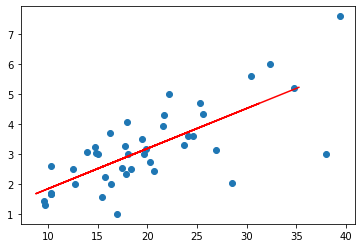

In [8]:
def localRegression(X0, X, Y, tau):
    X0 = np.r_[1, X0]
    X = np.c_[np.ones(len(X)), X]
    xw = X.T * kernel(X0, X, tau)
    # @ is numpy matrix multiplication operator
    beta = np.linalg.pinv(xw@X)@xw@Y

    # multiply point by weight to get prediction
    return X0@beta

def kernel(X0, X, tau):  
    return(np.exp(np.sum( (X-X0)**2 / (-2*tau**2), axis=1)) )
     
def plot_lwr(tau):
    domain = x_test
    prediction = [localRegression(X0, x_train, y_train, tau) for X0 in domain]
    plt.scatter(x_train,y_train)
    plt.plot(domain,prediction,color='red')
    plt.show()

plot_lwr(50)